## Пример статистической обработки данных с помошью языка программирования в Python

In [ ]:
# раскомментирвоть (убрать символ #) строки ниже для установки модулей в mybinder.org
#!pip install scipy
#!pip install seaborn

In [1]:
# подключение модулей
from scipy import stats  # статистика, распределения, ....
import numpy as np  # вычисление числовых характеристик
import seaborn  # построение графиков

### Даны результаты испытаний образцов бетона

https://www.raeng.org.uk/publications/other/6-concrete-testing (стр 4)

$f_c$ - H/мм^2


1. Определить среднюю прочность, стандартное отклонение
1. Построить гистограмму распределения
1. Построить диаграмму размаха. Проверить выбросы.
1. Проверить гипотезу о нормальности распределения
1. Определить 95% доверительный интервал для среднего значения (в предположении, что распределение нормальное)
1. Определить прочность бетона с обеспеченностью 0.95




In [2]:
# создадим список из измеренний прочности на сжатие (выборку)
fc = [36.64, 40.96, 27.42, 24.10, 41.44, 34.94, 25.32, 41.14, 37.36, 31.64, 41.42, 
      37.53, 23.34, 36.43, 31.81, 33.65, 33.88, 38.19, 24.79, 24.81]

In [3]:
# количество занчений
len(fc)

20

In [4]:
# вычисление среднего
np.mean(fc)

33.3405

In [5]:
# стандартное отклонение
np.std(fc)

6.189766938261892

## Гистограмма

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


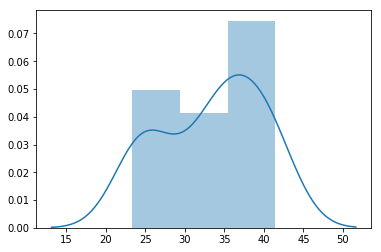

In [6]:
seaborn.distplot(fc)

## Диаграмма размаха (ящик с усам)

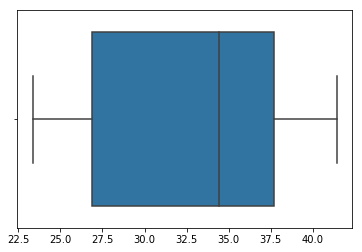

In [7]:
seaborn.boxplot(fc)

## Проверка гипотезы: выборка сделана из ген. совокупности распределённой по нормальному закону

$H_0$: выборка сделана из нормально распределённой ген. совокупности

см. спраку по функции normaltest: help( scipy.stats.normaltest )

Проверка осуществляется по *p-value*. p-value -- упрощённо: вероятность ошибится отклонив нулевую гипотезу.

Здесь и далее будем использовать уровень значимости α=0.05.

Уровень значимости -- допустимая вероятность совершить ошибку, отклонив нулевую гипотезу.

**Правило принятия нулевой гипотезы: **

- Нулевая гипотеза принимается, если p-value > $\alpha$

- Нулевая гипотеза отклоняется и принимается альтернативная (противоположная нулевой) гипотеза если p-value < $\alpha$

In [8]:
stats.normaltest(fc)
# здесь p-value > 0.05, поэтому принимаем нулевую гипотезу: 
# Выборка сделана из нормально распределённой генеральной совокупности

NormaltestResult(statistic=4.386007866389702, pvalue=0.11158106262267369)

Вывод: принимаем нулевую гипотезу

## Определение параметров распределения

- Распределение генеральной совкупности определено: нормальное распределение
- Значит можем применять функцию плотности и функцию распределения именно этого закона

$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e ^ {-\frac{(x-\mu)^2}{2\sigma^2}} $

$ F(x) = \int \limits_{-\infty}^{x} f(x) dx $

- Параметры распределения -- величины, входящие в функцию плотности (функцию распределения), кроме x

- Вид кривой этого распределения зависит от двух параметров: 
    - Математического ожидания
    - Стандартного отклонения
- Эти параметры определены ранее
- Теперь можно делать выводы основываясь на вышеприведённых данных, а не на эксперементальных (набор значений записанный в переменную fc)

Функция плотности

$ f(x) = \frac{1}{6.19 \sqrt{2\pi}} e ^ {-\frac{(x-33.34)^2}{2 \cdot 6.19^2}} $


## Определение класса бетона по испытаниям
Определим такое значение прочности бетона, что 95% образцов будет иметь прочность больше.
На рисунке 95% образцов соответствует закрашеная площадь под кривой нормального распределения, а искомому значению - ордината левой границы заштрихованой области.

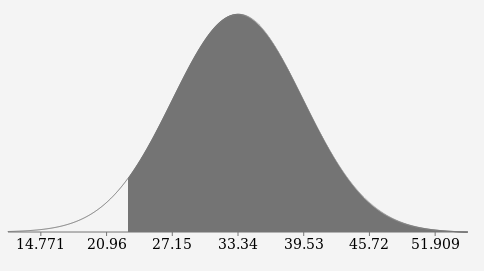

Искомое значение фактически определяется из уравнения $ 1 - F(x) = 0.95$,
где $F(x)$  - функция распределения, $x$ - искомая величина



In [9]:
stats.norm.isf(0.95, scale=6.189766938261892, loc = 33.3405)

23.159239401615615

Согласно таблице:


23.16 Н/мм2 = 23.16 * 10000000 Па = 23.16МПа

Значит бетон соответствует марке B22.5 

[таблица](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%BE%D0%BD#%D0%9F%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BD%D0%B0_%D1%81%D0%B6%D0%B0%D1%82%D0%B8%D0%B5)

## Вопросы
1. Что такое выборка? Что такое генеральная совокупность?
1. Какие числовые характеристики использовались для описания выборки?
1. Как выборка была представлена графически?
1. Какой закон распределения описывает генеральную совокупность?
1. Что такое статистическая гипотеза?
1. Что такое p-value?
1. Как проверить статистическую гипотезу?
1. Как вычислить некоторое значение случайной величины с заданной обеспеченностью?